In [127]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [128]:
folder_path = r"\\10.99.68.53\Digital pathology image lib\_Image libraries for training\2023-05-09 Published HE Nuclei Datasets\Segmentation Scores\2D_versatile_he"
df_scores = pd.read_csv(os.path.join(folder_path, '40x_Scoring.csv'))

In [129]:
df_scores

,Model,Input Scaling,Dataset,Tile,Tau,TP,FP,FN,Precision,Recall,F1-Score,Panoptic Quality
0,2D_versatile_he,00 - Nearest Neighbor - Nearest Neighbor,CoNSeP,test_1,0.1,287,25,571,0.919872,0.334499,0.490598,0.111012
1,2D_versatile_he,00 - Nearest Neighbor - Nearest Neighbor,CoNSeP,test_1,0.2,172,140,686,0.551282,0.200466,0.294017,0.081077
2,2D_versatile_he,00 - Nearest Neighbor - Nearest Neighbor,CoNSeP,test_1,0.3,48,264,810,0.153846,0.055944,0.082051,0.028295
3,2D_versatile_he,00 - Nearest Neighbor - Nearest Neighbor,CoNSeP,test_1,0.4,5,307,853,0.016026,0.005828,0.008547,0.003928
4,2D_versatile_he,00 - Nearest Neighbor - Nearest Neighbor,CoNSeP,test_1,0.5,1,311,857,0.003205,0.001166,0.001709,0.000920
...,...,...,...,...,...,...,...,...,...,...,...,...
16285,2D_versatile_he,__ - 40x Native,TNBC,11_3,0.5,54,2,24,0.964286,0.692308,0.805970,0.633313
16286,2D_versatile_he,__ - 40x Native,TNBC,11_3,0.6,52,4,26,0.928571,0.666667,0.776119,0.616896
16287,2D_versatile_he,__ - 40x Native,TNBC,11_3,0.7,47,9,31,0.839286,0.602564,0.701493,0.566914
16288,2D_versatile_he,__ - 40x Native,TNBC,11_3,0.8,27,29,51,0.482143,0.346154,0.402985,0.344977


In [130]:
df = df_scores[df_scores['Dataset'].str.contains('CoNSeP') \
             | df_scores['Dataset'].str.contains('CryoNuSeg') \
             | df_scores['Dataset'].str.contains('JHU')]
df = df.groupby(by=['Input Scaling', 'Tau']).agg({'Precision': ['mean', 'std'],
                                                         'Recall': ['mean', 'std'],
                                                         'F1-Score': ['mean', 'std'],}).reset_index(drop=False)
current_order = df['Input Scaling'].unique().tolist()
custom_order = current_order[-1:] + current_order[:-1]
df['Input Scaling'] = pd.Categorical(df['Input Scaling'], categories=custom_order, ordered=True)
df = df.sort_values(by='Input Scaling')
df

Input Scaling  Tau Precision              Recall             
                                         mean       std      mean       std   
116            __ - 40x Native  0.9  0.029518  0.028786  0.015566  0.018294  \
114            __ - 40x Native  0.7  0.598285  0.170978  0.300906  0.132456   
113            __ - 40x Native  0.6  0.741098  0.159845  0.370865  0.135612   
112            __ - 40x Native  0.5  0.831005  0.134127  0.414385  0.132505   
111            __ - 40x Native  0.4  0.904217  0.115919  0.449554  0.131801   
..                         ...  ...       ...       ...       ...       ...   
103  _2 - 20x Native - Bicubic  0.5  0.893605  0.058047  0.549174  0.121455   
102  _2 - 20x Native - Bicubic  0.4  0.952033  0.035964  0.582901  0.114268   
101  _2 - 20x Native - Bicubic  0.3  0.974080  0.033265  0.595531  0.111625   
107  _2 - 20x Native - Bicubic  0.9  0.028983  0.033636  0.019461  0.024537   
100  _2 - 20x Native - Bicubic  0.2  0.978861  0.032620  0.598328  0.111313   

     F1-Score            
         mean       std  
116  0.020058  0.022043  
114  0.394670  0.149800  
113  0.487001  0.147862  
112  0.544632  0.138377  
111  0.591307  0.132399  
..        ...       ...  
103  0.674154  0.103566  
102  0.716585  0.090900  
101  0.732502  0.086338  
107  0.023155  0.028268  
100  0.735998  0.085577  

[117 rows x 8 columns]

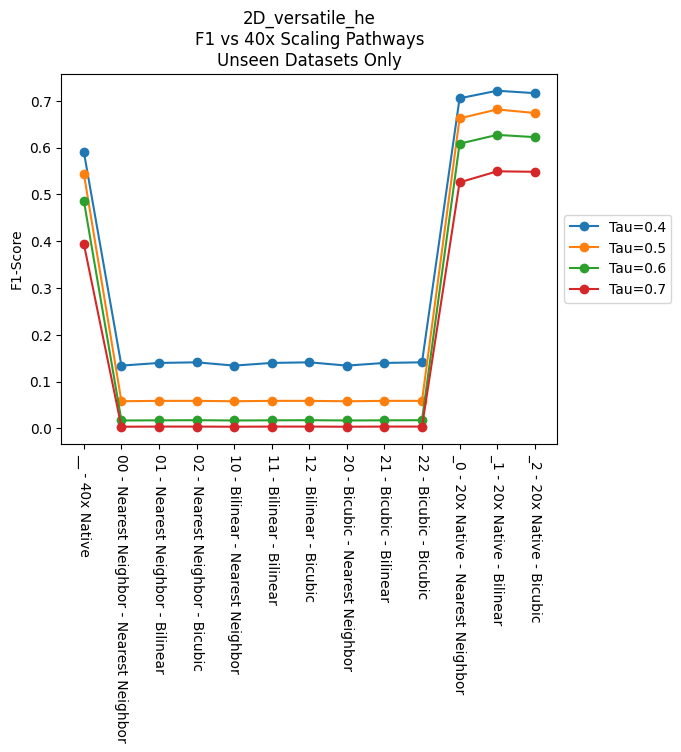

In [131]:
fig, ax = plt.subplots()

for name, group in df[(df['Tau'] > 0.3) & (df['Tau'] < 0.8)].groupby(('Tau', '')):
    # ax.errorbar(group[('Input Scaling', '')], group[('Precision', 'mean')], yerr=group[('Precision', 'std')], label=f'B={name}', fmt='o', capsize=5)
    ax.plot(group[('Input Scaling', '')], group[('F1-Score', 'mean')], marker='o', label=f'Tau={name}')
ax.set_ylabel('F1-Score')
ax.set_title('2D_versatile_he\nF1 vs 40x Scaling Pathways\nUnseen Datasets Only')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=270)
plt.savefig('chart.png', bbox_inches='tight')
plt.show()